In [98]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_bloch_vector

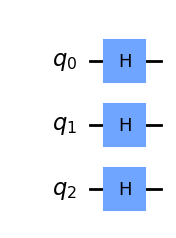

In [99]:
# 3量子ビットの場合
grover_circuit = QuantumCircuit(3)
grover_circuit.h([0,1,2])
grover_circuit.draw(output="mpl", filename="gc3-1.png")

In [100]:
state = Statevector.from_instruction(grover_circuit)
state.draw("latex")

<IPython.core.display.Latex object>

In [101]:
state.draw("text")

[0.35355339+0.j,0.35355339+0.j,0.35355339+0.j,0.35355339+0.j,
 0.35355339+0.j,0.35355339+0.j,0.35355339+0.j,0.35355339+0.j]

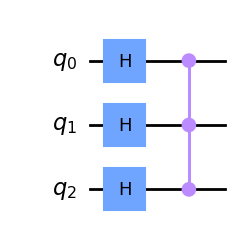

In [102]:
# オラクルを追加。（正解にマークをつける）
# |111>を正解として、制御Zゲートで|111>の位相を反転させる。
grover_circuit.ccz(0,1,2)
grover_circuit.draw(output="mpl", filename="gc3-2.png")

In [103]:
state = Statevector.from_instruction(grover_circuit)
state.draw("latex")

<IPython.core.display.Latex object>

In [104]:
state.draw("text")

[ 0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j,
  0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j,-0.35355339+0.j]

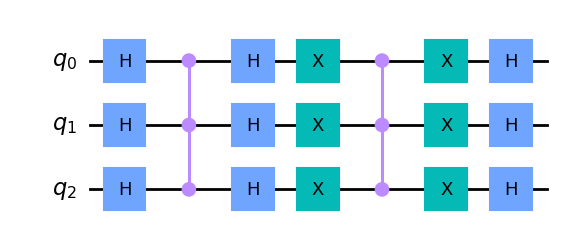

In [105]:
# 振幅増幅。
# 正解のマークがついているヤツの位相を反転して増幅する、らしい。
grover_circuit.h([0,1,2])
grover_circuit.x([0,1,2])
grover_circuit.ccz(0,1,2)
grover_circuit.x([0,1,2])
grover_circuit.h([0,1,2])
grover_circuit.draw(output="mpl", filename="gc3-3.png")

In [106]:
state = Statevector.from_instruction(grover_circuit)
state.draw("latex")

<IPython.core.display.Latex object>

In [107]:
state.draw("text")

[-0.1767767 +0.j,-0.1767767 +0.j,-0.1767767 +0.j,-0.1767767 +0.j,
 -0.1767767 +0.j,-0.1767767 +0.j,-0.1767767 +0.j,-0.88388348+0.j]

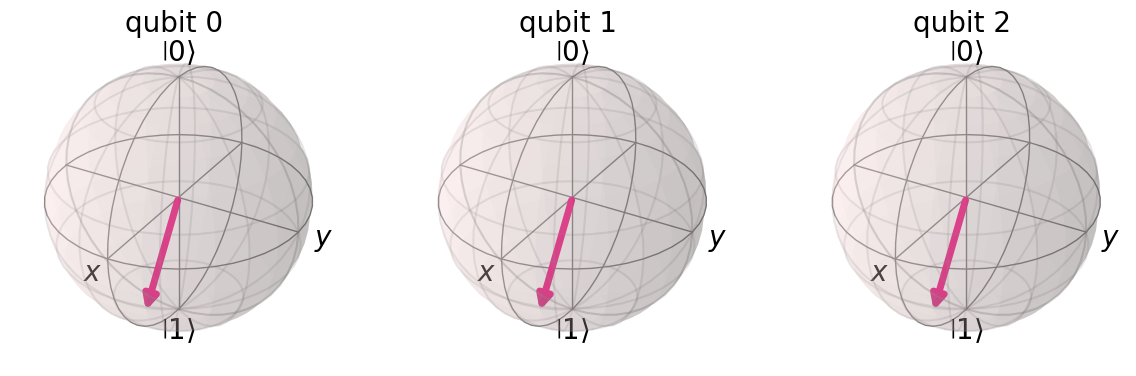

In [108]:
state.draw("bloch")

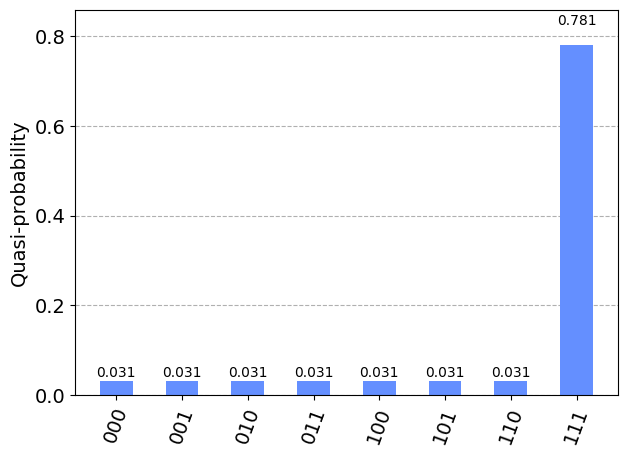

In [109]:
backend = Aer.get_backend('statevector_simulator')
result = execute(grover_circuit, backend).result()
counts = result.get_counts()
plot_histogram(counts)
